<a href="https://colab.research.google.com/github/joaopgioio/projetoJaponesesVSCoreanosWithoutAugmentation/blob/master/l05c01_japanese_vs_koreans_without_augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##### Copyright 2019 The TensorFlow Authors.

In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Classificação de imagens de Japoneses x Coreanos sem aumento de imagem

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/tensorflow/examples/blob/master/courses/udacity_intro_to_tensorflow_for_deep_learning/l05c01_dogs_vs_cats_without_augmentation.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/tensorflow/examples/blob/master/courses/udacity_intro_to_tensorflow_for_deep_learning/l05c01_dogs_vs_cats_without_augmentation.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
  </td>
</table>

In this tutorial, we will discuss how to classify images into pictures of cats or pictures of dogs. We'll build an image classifier using `tf.keras.Sequential` model and load data using `tf.keras.preprocessing.image.ImageDataGenerator`.

## Specific concepts that will be covered:
In the process, we will build practical experience and develop intuition around the following concepts

* Building _data input pipelines_ using the `tf.keras.preprocessing.image.ImageDataGenerator` class — How can we efficiently work with data on disk to interface with our model?
* _Overfitting_ - what is it, how to identify it?

<hr>


**Before you begin**

Before running the code in this notebook, reset the runtime by going to **Runtime -> Reset all runtimes** in the menu above. If you have been working through several notebooks, this will help you avoid reaching Colab's memory limits.


# Importando pacotes

Vamos começar importando os pacotes necessários:

* os — para ler arquivos e estrutura de diretórios
* numpy — para alguma matemática matricial fora do TensorFlow
* matplotlib.pyplot — para traçar o gráfico e exibir imagens em nossos dados de treinamento e validação


In [1]:
import tensorflow as tf

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
import os
import matplotlib.pyplot as plt
import numpy as np
import zipfile

In [5]:
import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

# Carregamento de dados

Para construir nosso classificador de imagens, começamos baixando o conjunto de dados. O conjunto de dados que estamos usando baixamos nesse notebook <a href="https://github.com/joaopgioio/projetoJaponesesVSCoreanosWithoutAugmentation/blob/master/baixar_imagens_google.ipynb">Baixar Imagens</a> que criamos para ir na internet e buscar fotos de japoneses e coreanos.
Após baixarmos as imagens, montamos o drive para jogar as imagens baixadas, e ai acessamos no drive e baixamos tudo para nossa maquina (Esse processo poderia ser feito localmente e assim as imagens já ficaria na máquina), criamos a seguinte estrutura de diretório:

<pre style="font-size: 10.0pt; font-family: Arial; line-height: 2; letter-spacing: 1.0pt;" >
<b>koreans_and_japanese_filtered</b>
|__ <b>train</b>
    |______ <b>koreans</b>: [Koreans_201_1726343003.jpg, Koreans_202_1726343003.jpg, Koreans_203_1726343003.jpg ...]
    |______ <b>japanese</b>: [Japanese_201_1726343071.jpg, Japanese_202_1726343071.jpg, Japanese_203_1726343071.jpg ...]
|__ <b>validation</b>
    |______ <b>koreans</b>: [Koreans_201_1726343003.jpg, Koreans_202_1726343003.jpg, Koreans_203_1726343003.jpg ...]
    |______ <b>japanese</b>: [Japanese_201_1726343071.jpg, Japanese_202_1726343071.jpg, Japanese_203_1726343071.jpg ...]
</pre>


Após zipamos essa pasta e jogamos novamente ao drive e assim seguiremos para baxar e "dezipar".

Nos Colabs anteriores de nossos projetos, usamos conjuntos de dados do TensorFlow, que é uma maneira muito fácil e conveniente de usar conjuntos de dados. Neste Colab porém, faremos uso da classe tf.keras.preprocessing.image.ImageDataGenerator que irá ler os dados do disco. Portanto, precisamos baixar Japoneses vs. Coreanos diretamente de um URL e descompactá-lo no sistema de arquivos Colab.

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
!cp -r /content/drive/MyDrive/koreans_and_japanese_filtered.zip /content

In [8]:
#_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'
_URL = './koreans_and_japanese_filtered.zip'
#zip_dir = tf.keras.utils.get_file('koreans_and_japanese_filtered.zip', origin=_URL, extract=True)

O conjunto de dados que baixamos tem a seguinte estrutura de diretórios.

<pre style="font-size: 10.0pt; font-family: Arial; line-height: 2; letter-spacing: 1.0pt;" >
<b>koreans_and_japanese_filtered</b>
|__ <b>train</b>
    |______ <b>koreans</b>: [Koreans_201_1726343003.jpg, Koreans_202_1726343003.jpg, Koreans_203_1726343003.jpg ...]
    |______ <b>japanese</b>: [Japanese_201_1726343071.jpg, Japanese_202_1726343071.jpg, Japanese_203_1726343071.jpg ...]
|__ <b>validation</b>
    |______ <b>koreans</b>: [Koreans_201_1726343003.jpg, Koreans_202_1726343003.jpg, Koreans_203_1726343003.jpg ...]
    |______ <b>japanese</b>: [Japanese_201_1726343071.jpg, Japanese_202_1726343071.jpg, Japanese_203_1726343071.jpg ...]
</pre>

Podemos listar os diretórios com o seguinte comando de terminal:

In [9]:
with zipfile.ZipFile(_URL, 'r') as zip_ref:
    zip_ref.extractall('/content')

In [ ]:
#zip_dir_base = os.path.dirname(zip_dir)
#!find $zip_dir_base -type d -print

Agora atribuiremos variáveis ​​com o caminho de arquivo adequado para os conjuntos de treinamento e validação.

In [10]:
base_dir = os.path.join(os.path.dirname(_URL), 'koreans_and_japanese_filtered')
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

train_koreans_dir = os.path.join(train_dir, 'koreans')  # directory with our training cat pictures
train_japanese_dir = os.path.join(train_dir, 'japanese')  # directory with our training dog pictures
validation_koreans_dir = os.path.join(validation_dir, 'koreans')  # directory with our validation cat pictures
validation_japanese_dir = os.path.join(validation_dir, 'japanese')  # directory with our validation dog pictures

### Entendendo nossos dados

Vejamos quantas imagens de japoneses e coreanos temos em nosso diretório de treinamento e validação

In [11]:
num_koreans_tr = len(os.listdir(train_koreans_dir))
num_japanese_tr = len(os.listdir(train_japanese_dir))

num_koreans_val = len(os.listdir(validation_koreans_dir))
num_japanese_val = len(os.listdir(validation_japanese_dir))

total_train = num_koreans_tr + num_japanese_tr
total_val = num_koreans_val + num_japanese_val

In [12]:
print('total training koreans images:', num_koreans_tr)
print('total training japanese images:', num_japanese_tr)

print('total validation koreans images:', num_koreans_val)
print('total validation japanese images:', num_japanese_val)
print("--")
print("Total training images:", total_train)
print("Total validation images:", total_val)

total training koreans images: 114
total training japanese images: 114
total validation koreans images: 56
total validation japanese images: 56
--
Total training images: 228
Total validation images: 112


# Definir parâmetros do modelo

Por conveniência, configuraremos variáveis ​​que serão usadas posteriormente durante o pré-processamento de nosso conjunto de dados e o treinamento de nossa rede.

In [13]:
BATCH_SIZE = 100  # Number of training examples to process before updating our models variables
IMG_SHAPE  = 150  # Our training data consists of images with width of 150 pixels and height of 150 pixels

# Preparação de Dados

As imagens devem ser formatadas em tensores de ponto flutuante pré-processados ​​adequadamente antes de serem alimentadas na rede. As etapas envolvidas na preparação dessas imagens são:

1. Leia imagens do disco
2. Decodifique o conteúdo dessas imagens e converta-o no formato de grade adequado de acordo com seu conteúdo RGB
3. Converta-os em tensores de ponto flutuante
4. Redimensione os tensores de valores entre 0 e 255 para valores entre 0 e 1, pois as redes neurais preferem lidar com pequenos valores de entrada.

Felizmente, todas essas tarefas podem ser realizadas usando a classe **tf.keras.preprocessing.image.ImageDataGenerator**.

Podemos configurar isso em algumas linhas de código.

In [14]:
train_image_generator      = ImageDataGenerator(rescale=1./255)  # Generator for our training data
validation_image_generator = ImageDataGenerator(rescale=1./255)  # Generator for our validation data

Depois de definir nossos geradores para imagens de treinamento e validação, o método **flow_from_directory** carregará imagens do disco, aplicará o reescalonamento e redimensioná-las usando uma única linha de código.

In [1]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=BATCH_SIZE,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_SHAPE,IMG_SHAPE), #(150,150)
                                                           class_mode='binary')

NameError: name 'train_image_generator' is not defined

In [16]:
val_data_gen = validation_image_generator.flow_from_directory(batch_size=BATCH_SIZE,
                                                              directory=validation_dir,
                                                              shuffle=False,
                                                              target_size=(IMG_SHAPE,IMG_SHAPE), #(150,150)
                                                              class_mode='binary')

Found 112 images belonging to 2 classes.


### Visualizando imagens de treinamento

Podemos visualizar nossas imagens de treinamento obtendo um lote de imagens do gerador de treinamento e, em seguida, plotando algumas delas usando `matplotlib`.

In [17]:
sample_training_images, _ = next(train_data_gen)

A função `next` retorna um lote do conjunto de dados. Um lote é uma tupla de (*muitas imagens*, *muitos rótulos*). Por enquanto estamos descartando os rótulos porque queremos apenas olhar as imagens.

In [18]:
# This function will plot images in the form of a grid with 1 row and 5 columns where images are placed in each column.
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

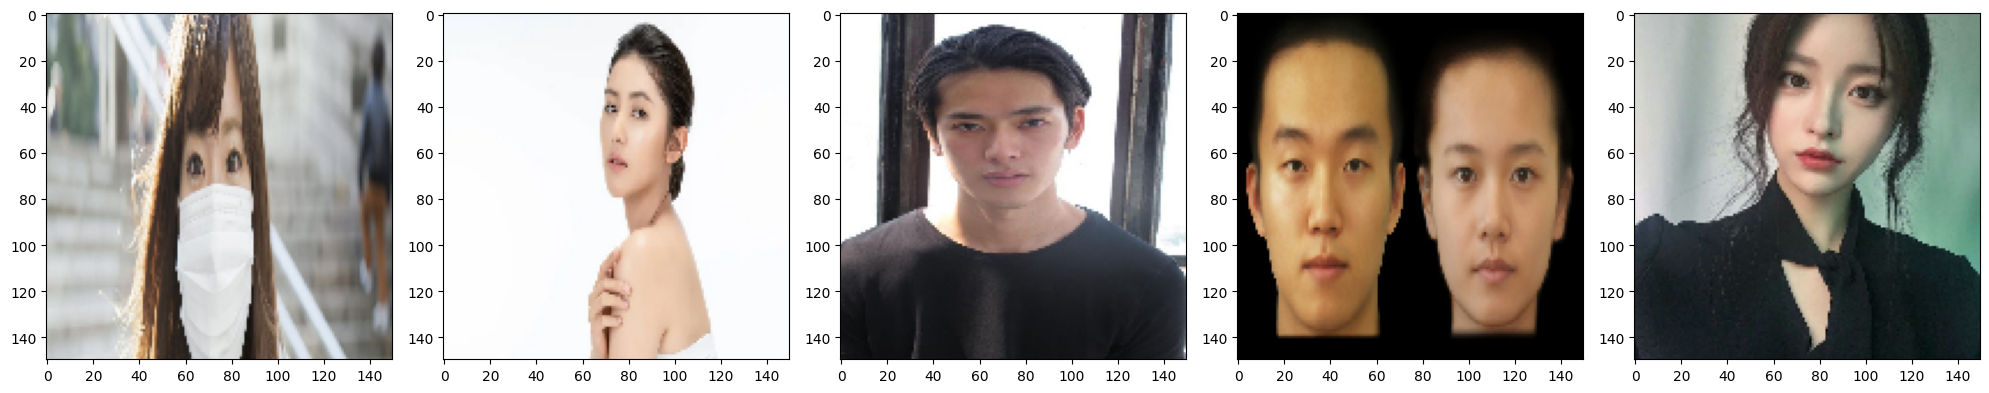

In [19]:
plotImages(sample_training_images[:5])  # Plot images 0-4

# Criação de modelo

## Defina o modelo

O modelo consiste em quatro blocos de convolução com uma camada máxima de pool em cada um deles. Então temos uma camada totalmente conectada com 512 unidades, com uma função de ativação `relu`. O modelo produzirá probabilidades de classe para duas classes — japoneses e coreanos — usando `softmax`.

In [43]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(2)
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### Compile o modelo

Como de costume, usaremos o otimizador `adam`. Como geramos uma categorização softmax, usaremos `sparse_categorical_crossentropy` como função de perda. Também gostaríamos de analisar a precisão do treinamento e da validação em cada época à medida que treinamos nossa rede, por isso estamos transmitindo o argumento das métricas.

In [44]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

### Resumo do modelo

Vejamos todas as camadas da nossa rede usando o método **summary**.

In [45]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_33 (Conv2D)                   │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_33 (MaxPooling2D)      │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_34 (Conv2D)                   │ (None, 74, 74, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_34 (MaxPooling2D)      │ (None, 37, 37, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_35 (Conv2D)                   │ (None, 37, 37, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_35 (MaxPooling2D)      │ (None, 18, 18, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_36 (Conv2D)                   │ (None, 18, 18, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_36 (MaxPooling2D)      │ (None, 9, 9, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_37 (Conv2D)                   │ (None, 9, 9, 128)           │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_37 (MaxPooling2D)      │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_38 (Conv2D)                   │ (None, 4, 4, 128)           │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_38 (MaxPooling2D)      │ (None, 2, 2, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 2)                   │           1,026 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 799,682 (3.05 MB)

 Trainable params: 799,682 (3.05 MB)

 Non-trainable params: 0 (0.00 B)

### Treine o modelo

É hora de treinarmos nossa rede.

Como nossos lotes vêm de um gerador (`ImageDataGenerator`), usaremos `fit_generator` em vez de `fit`.

In [2]:
# Testar o gerador
#for data_batch, labels_batch in val_data_gen:
#    print('Formato do lote de dados:', data_batch.shape)
#    print('Formato do lote de rótulos:', labels_batch.shape)
#    print('Dados do lote:', data_batch) # Print the data to inspect its content
#    print('Rótulos do lote:', labels_batch) # Print the labels to inspect its content
#    break  # Imprimir apenas o primeiro lote

In [3]:
EPOCHS = 100
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=int(np.ceil(total_train / float(BATCH_SIZE))),
    epochs=EPOCHS,
    validation_data=val_data_gen,
    validation_steps=None
    #validation_steps=int(np.ceil(total_val / float(BATCH_SIZE)))
)

NameError: name 'model' is not defined

### Visualizando os resultados do treinamento

Agora visualizaremos os resultados que obtemos após treinar nossa rede.

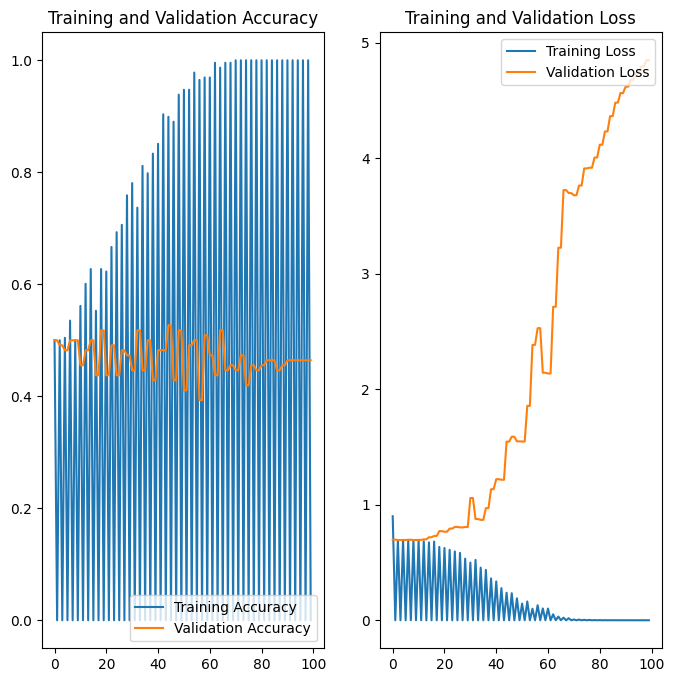

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.savefig('./foo.png')
plt.show()

As we can see from the plots, training accuracy and validation accuracy are off by large margin and our model has achieved only around **70%** accuracy on the validation set (depending on the number of epochs you trained for).

This is a clear indication of overfitting. Once the training and validation curves start to diverge, our model has started to memorize the training data and is unable to perform well on the validation data.